In [1]:
import numpy as np
import pandas as pd


In [2]:
data  = pd.read_csv(r'C:\Users\Public\My Project\Miniproject\Miniproject\labeled_data2.csv')

In [3]:
unique_length = data['Length'].unique()
print(unique_length)

[1514 1057  574   74  954  126 2962   66 1682 2770]


In [17]:
count = len(data[(data['Source']== '10.0.0.1') & (data['Label']== 0)])
print(count)

265


In [4]:
data

,Time,Source,Destination,Protocol,Length
0,153.135246,10.0.0.2,10.0.0.6,TCP,574
1,153.135276,10.0.0.6,10.0.0.2,TCP,54
2,153.141085,10.0.0.2,10.0.0.6,TCP,574
3,153.141136,10.0.0.6,10.0.0.2,TCP,54
4,153.141869,10.0.0.2,10.0.0.6,TCP,574
...,...,...,...,...,...
22322,391.779290,10.0.0.1,10.0.0.6,TCP,574
22323,391.791078,10.0.0.3,10.0.0.6,TCP,574
22324,391.791080,10.0.0.4,10.0.0.6,TCP,574
22325,391.791107,10.0.0.6,10.0.0.3,TCP,54


In [5]:
data.columns

Index(['Time', 'Source', 'Destination', 'Protocol', 'Length'], dtype='object')

In [7]:
data.notnull().sum()

Time           22327
Source         22327
Destination    22327
Protocol       22327
Length         22327
dtype: int64

In [8]:
data

,Time,Source,Destination,Protocol,Length
0,153.135246,10.0.0.2,10.0.0.6,TCP,574
1,153.135276,10.0.0.6,10.0.0.2,TCP,54
2,153.141085,10.0.0.2,10.0.0.6,TCP,574
3,153.141136,10.0.0.6,10.0.0.2,TCP,54
4,153.141869,10.0.0.2,10.0.0.6,TCP,574
...,...,...,...,...,...
22322,391.779290,10.0.0.1,10.0.0.6,TCP,574
22323,391.791078,10.0.0.3,10.0.0.6,TCP,574
22324,391.791080,10.0.0.4,10.0.0.6,TCP,574
22325,391.791107,10.0.0.6,10.0.0.3,TCP,54


In [6]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r'C:\Users\Public\My Project\Miniproject\MiniProject\filteredMixTrafficdata.csv')

In [3]:
data = data.drop(columns=["Length"])
data.to_csv("test.csv", index=False)

In [5]:
# Define the categorical and numerical columns
cat_cols = ['Source', 'Destination', 'Protocol']
num_cols = ['Time']

# Define the column transformer
ct = ColumnTransformer([
    ('encoder', OneHotEncoder(sparse=False), cat_cols),
    ('scaler', StandardScaler(), num_cols)
])

# Transform the data
X = ct.fit_transform(data)

# Define the k-means clustering algorithm
kmeans = KMeans(n_clusters=2, random_state=42)


# Fit the k-means clustering algorithm to the data
kmeans.fit(X)

# Print the cluster labels for each data point
print(kmeans.labels_)

labels= kmeans.labels_
data['Label'] = labels

# Save the DataFrame with the labels to a new CSV file
data.to_csv('labeled_test.csv', index=False)


[1 1 1 ... 0 0 0]


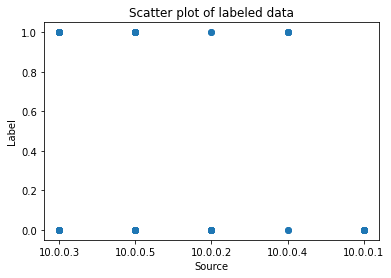

In [7]:
import matplotlib.pyplot as plt
plt.scatter(data['Source'], data['Label'])
plt.xlabel('Source')
plt.ylabel('Label')
plt.title('Scatter plot of labeled data')
plt.show()

[0 0 0 ... 1 1 1]


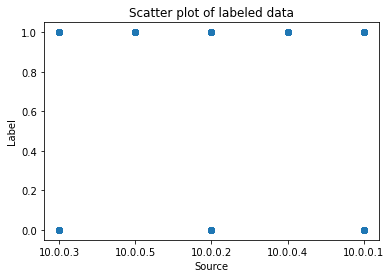

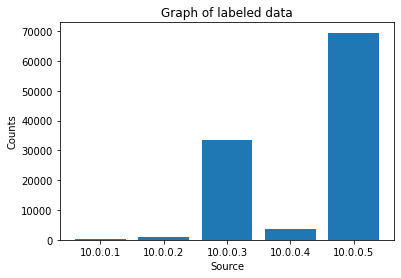

C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [3]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data into a pandas DataFrame
data = pd.read_csv('MixTrafficPreprocess.csv')

# Define the categorical and numerical columns
cat_cols = ['Source', 'Destination', 'Protocol']
num_cols = ['Length','Time']

# Define the column transformer
ct = ColumnTransformer([
    ('encoder', OneHotEncoder(sparse=False), cat_cols),
    ('scaler', StandardScaler(), num_cols)
])

# Transform the data
X = ct.fit_transform(data)

# Define the k-means clustering algorithm
kmeans = KMeans(n_clusters=2, random_state=42)


# Fit the k-means clustering algorithm to the data
kmeans.fit(X)

# Print the cluster labels for each data point
print(kmeans.labels_)

labels= kmeans.labels_
data['Label'] = labels

# Save the DataFrame with the labels to a new CSV file
data.to_csv('labeled_data2.csv', index=False)

# Plot scatter plot
plt.scatter(data['Source'], data['Label'])
plt.xlabel('Source')
plt.ylabel('Label')
plt.title('Scatter plot of labeled data')
plt.show()

# Plot graph
grouped = data.groupby(['Source']).size().reset_index(name='Counts')
plt.bar(grouped['Source'], grouped['Counts'])
plt.xlabel('Source')
plt.ylabel('Counts')
plt.title('Graph of labeled data')
plt.show()


# Get the cluster centroids
centroids = kmeans.cluster_centers_

# Create a DataFrame of the cluster centroids with the correct column names
cat_col_names = ct.named_transformers_['encoder'].get_feature_names(cat_cols)
col_names = list(cat_col_names) + num_cols
centroid_df = pd.DataFrame(centroids, columns=col_names)

# # Plot a heatmap of the cluster centroids
# sns.heatmap(centroid_df, cmap="YlGnBu")
# plt.title('Heatmap of Cluster Centroids')
# plt.show()

In [28]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
silhouette_score = silhouette_score(X, kmeans.labels_)
print("Silhouette Score: ", silhouette_score)

# Get the inertia value
inertia = kmeans.inertia_
print("Inertia: ", inertia)

Silhouette Score:  0.5771813957730122
Inertia:  154133.57961084755


In [14]:
import pandas as pd

# Load the data into a pandas DataFrame
data = pd.read_csv('MixTrafficPreprocess.csv')

# List of specific source IP addresses
specific_source_ips = ['10.0.0.1', '10.0.0.2']  # Replace with your specific source IP addresses

# Filter the data to get the count of occurrences for the specific source IP addresses
filtered_data = data[data['Source'].isin(specific_source_ips)]
grouped = filtered_data.groupby('Source').size().reset_index(name='Counts')

# Print the count for each specific source IP address
for index, row in grouped.iterrows():
    source_ip = row['Source']
    count = row['Counts']
    print(f"Count of occurrences for source IP '{source_ip}': {count}")


Count of occurrences for source IP '10.0.0.1': 287
Count of occurrences for source IP '10.0.0.2': 936


In [15]:


# Save the filtered data to a new CSV file
filtered_data.to_csv('filteredMixTrafficdata.csv', index=False)

In [19]:
filtered_data.to_csv('filterednotgenMixTrafficdata.csv', index=False)

In [20]:


import pandas as pd

# Load the original data into a pandas DataFrame
data = pd.read_csv('filterednotgenMixTrafficdata.csv')

# Get a random sample of 305 rows from the original data
random_data = data.sample(n=305, random_state=42)  # Change the random_state to any desired value for different random samples

# Save the sampled data with original source IPs to a new CSV file
random_data.to_csv('your_random_data.csv', index=False)

# Print a message to indicate successful creation of the new CSV file
print("New CSV file with 305 randomly sampled rows has been created.")


New CSV file with 305 randomly sampled rows has been created.


In [23]:
import pandas as pd

# Load the first CSV file into a pandas DataFrame
df1 = pd.read_csv('filteredMixTrafficdata.csv')

# Load the second CSV file into another pandas DataFrame
df2 = pd.read_csv('your_random_data.csv')

# Append the second DataFrame to the first DataFrame
merged_df = df1.append(df2, ignore_index=True)

# Save the merged DataFrame to a new CSV file
merged_df.to_csv('filteredMixTrafficdata.csv', index=False)

# Print a message to indicate successful appending of the two CSV files
print("Two CSV files have been successfully appended and saved as filteredMixTrafficdata.csv.")

Two CSV files have been successfully appended and saved as filteredMixTrafficdata.csv.


C:\Users\DELL\AppData\Local\Temp\ipykernel_26712\88698664.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_df = df1.append(df2, ignore_index=True)


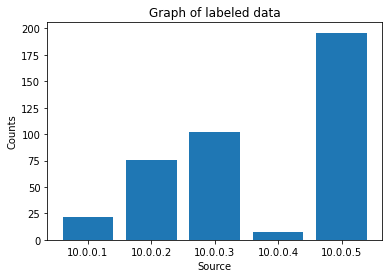

In [26]:

import pandas as pd
import matplotlib.pyplot as plt
# Load the original data into a pandas DataFrame
data = pd.read_csv('test_data.csv')
grouped = data.groupby(['Source']).size().reset_index(name='Counts')
plt.bar(grouped['Source'], grouped['Counts'])
plt.xlabel('Source')
plt.ylabel('Counts')
plt.title('Graph of labeled data')
plt.show()

In [27]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('labeled_data2.csv')

# Filter the rows based on the Label column value
df_label_0 = df[df['Label'] == 0]
df_label_1 = df[df['Label'] == 1]

# Group by Source IP and count the occurrences for Label 0
count_label_0 = df_label_0['Source'].value_counts().reset_index()
count_label_0.columns = ['Source IP', 'Count of Label 0']

# Group by Source IP and count the occurrences for Label 1
count_label_1 = df_label_1['Source'].value_counts().reset_index()
count_label_1.columns = ['Source IP', 'Count of Label 1']

print("Count of Source IPs with Label 0:")
print(count_label_0)

print("\nCount of Source IPs with Label 1:")
print(count_label_1)


Count of Source IPs with Label 0:
  Source IP  Count of Label 0
0  10.0.0.2               860
1  10.0.0.1               265

Count of Source IPs with Label 1:
  Source IP  Count of Label 1
0  10.0.0.5               196
1  10.0.0.3               102
2  10.0.0.2                76
3  10.0.0.1                22
4  10.0.0.4                 7


In [24]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('filteredMixTrafficdata.csv')

# Sort the DataFrame by the 'Time' column
df.sort_values('Time', inplace=True)

# Save the sorted DataFrame to the same CSV file
df.to_csv('filteredMixTrafficdata.csv', index=False)

# Print a message to indicate successful sorting and saving
print("CSV file has been sorted by 'Time' column and saved successfully.")


CSV file has been sorted by 'Time' column and saved successfully.


In [25]:
df = pd.read_csv('labeled_data2.csv')
# Filter the DataFrame to include only rows where 'Label' is 1
df_filtered = df[df['Label'] == 1]

# Save the filtered DataFrame to a new CSV file
df_filtered.to_csv('test_data.csv', index=False)

# Print a message to indicate successful saving
print("Filtered CSV file has been saved successfully.")

Filtered CSV file has been saved successfully.


In [18]:
filtered_data = data[~data['Source'].isin(specific_source_ips)]
grouped = filtered_data.groupby('Source').size().reset_index(name='Counts')

# Print the count for each specific source IP address
for index, row in grouped.iterrows():
    source_ip = row['Source']
    count = row['Counts']
    print(f"Count of occurrences for source IP '{source_ip}': {count}")

Count of occurrences for source IP '10.0.0.3': 33445
Count of occurrences for source IP '10.0.0.4': 3609
Count of occurrences for source IP '10.0.0.5': 69510
